In [ ]:
!pip install tensorflow

In [ ]:
!pip install Keras

# Dataset loading

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

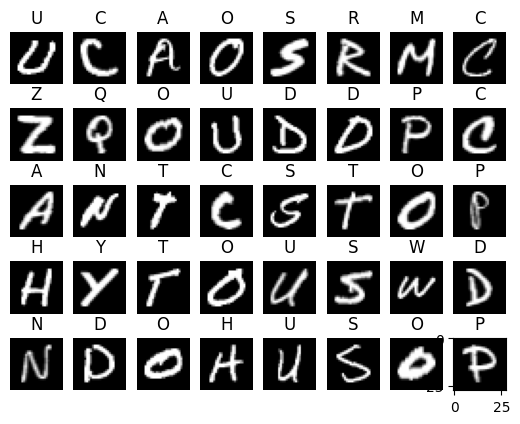

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

# Neural network modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model compilation

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data preparation

In [ ]:
x_train.shape

(297960, 784)

In [ ]:
x_test.shape

(74491, 784)

In [ ]:
# reshape the tensor
x_train = x_train.reshape((297960, 28 * 28)))

# Set the data type and normalize to the maximum value in the tensor (bring it to the range [0, 1])
x_train = x_train.astype('float32') / 255

# reshape the tensor
x_test = x_test.reshape((74491, 28 * 28)))

# Set the data type and normalize to the maximum value in the tensor (bring it to the range [0, 1])
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 26) # Code training labels into 26 classes
y_test = to_categorical(y_test, 26)   # Code test labels into 26 classes

# Training and evaluation of the model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8836 - loss: 0.4344 - val_accuracy: 0.9689 - val_loss: 0.1139
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9728 - loss: 0.0974 - val_accuracy: 0.9761 - val_loss: 0.0877
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9824 - loss: 0.0627 - val_accuracy: 0.9817 - val_loss: 0.0694
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0455 - val_accuracy: 0.9847 - val_loss: 0.0602
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0348 - val_accuracy: 0.9854 - val_loss: 0.0589


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy on test sample:', test_acc)
print('Losses on the test sample:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9851 - loss: 0.0629
Точность на тестовом образце: 0.9854344725608826
Потери на тестовом образце: 0.05893894284963608


# Prediction

In [ ]:
import numpy as np

# Select the desired picture from the test sample
n = 127
x = x_test[n]

# Check the shape of the data
print(x.shape)

(784,)


In [ ]:
# Array of one example, since neuronka accepts arrays of examples (batches) for recognition
x = np.expand_dims(x, axis=0)

# Check the shape of the data
print(x.shape)

# Predict the selected image
prediction = model.predict(x)

# Output the result - a vector of 26 numbers
print(f'Result vector on 26 output neurons: {prediction}')

# Obtain and output the index of the largest element (this is the value of the digit the network recognized)
pred = np.argmax(prediction)
print(f'Letter recognized: {word_dict[pred]}')
print(f'Correct value: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Вектор результата на 26 выходных нейронах: [[2.9018602e-12 6.4424312e-12 2.4399144e-11 9.0943739e-11 2.3253827e-07
  1.9223736e-09 5.0034873e-07 1.0011284e-12 5.4955080e-07 1.6912776e-05
  4.4201522e-12 1.0492581e-11 6.9953822e-19 9.8988764e-13 8.8324757e-11
  3.8240225e-13 2.3073293e-08 5.4661673e-17 9.9998176e-01 1.3380024e-13
  1.5679180e-10 5.5996917e-13 1.1502527e-14 1.1252871e-09 1.0043693e-10
  3.0350288e-11]]
Распознана буква: S
Правильное значение: S


# Visualization of the learning process

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

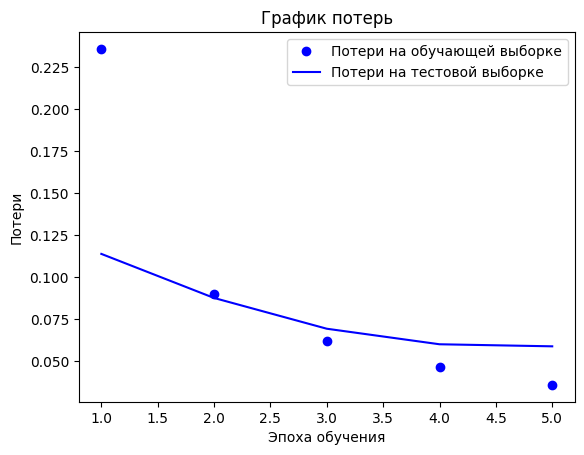

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Losses on the training sample')
plt.plot(epochs, val_loss_values, 'b', label='Losses on the test sample')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

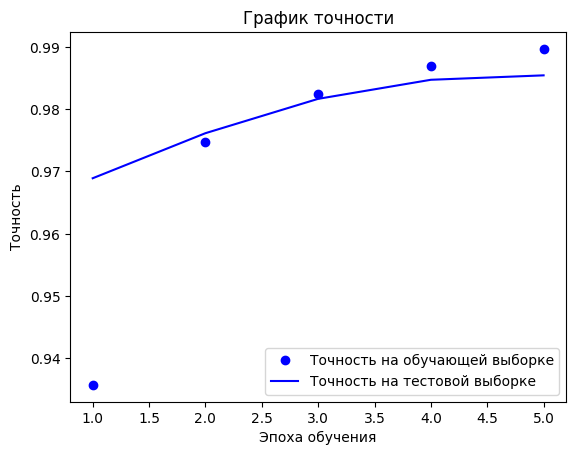

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Accuracy on training sample')
plt.plot(epochs, val_acc_values, 'b', label='Accuracy on the test sample')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Judging by the graphs of loss and accuracy, the model is in the state of undertraining, since there is no decline in accuracy on the test sample, hence, the model has not reached the effect of overtraining. Let us try to increase the number of epochs from 5 to 10.

# Pre-training

In [ ]:
history_additional = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9825 - val_loss: 0.0707
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9938 - loss: 0.0214 - val_accuracy: 0.9872 - val_loss: 0.0548
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.9872 - val_loss: 0.0553
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9898 - val_loss: 0.0480
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 0.9905 - val_loss: 0.0481


In [ ]:
# History of Learning Association
history.history['loss'].extend(history_additional.history['loss'])
history.history['accuracy'].extend(history_additional.history['accuracy'])
history.history['val_loss'].extend(history_additional.history['val_loss'])
history.history['val_accuracy'].extend(history_additional.history['val_accuracy'])

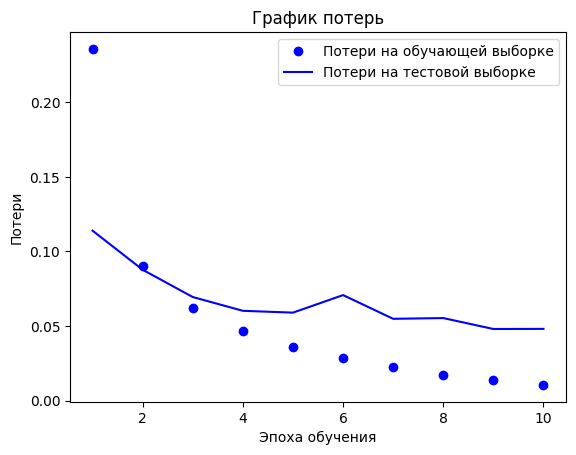

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Losses on the training sample')
plt.plot(epochs, val_loss_values, 'b', label='Losses on the test sample')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

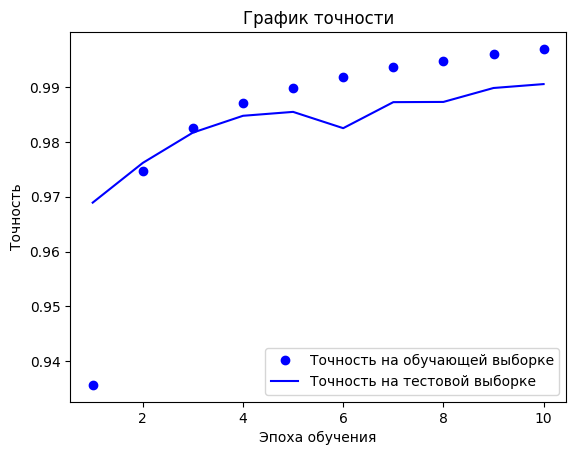

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Accuracy on training sample')
plt.plot(epochs, val_acc_values, 'b', label='Accuracy on the test sample')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy on the test sample:', test_acc)
print('Losses on the test sample:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0502
Точность на тестовом образце: 0.990495502948761
Потери на тестовом образце: 0.048050541430711746


In [ ]:
model.save('handwritten_detector.h5')

In [ ]:
from google.colab import files
files.download('handwritten_detector.h5')

Judging from the results of training at 10 epochs, we can assume that the overtraining effect is achieved at the 9th epoch. At the same time, the model obtained an accuracy of 98.8% on the test set. Let's try to prohibit some letters.

# Final check

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Вектор результата на 26 выходных нейронах: [[6.9811855e-29 2.6794237e-18 8.0284358e-13 5.7496656e-15 6.2925665e-11
  5.6927847e-17 2.9377309e-21 7.8634136e-24 1.6477359e-13 2.2085216e-24
  2.7109778e-10 1.0000000e+00 3.7284144e-22 7.9508493e-18 2.7324591e-25
  1.9355081e-30 1.4650672e-22 6.3794328e-18 3.4863723e-18 1.0263339e-23
  1.3674210e-09 2.2970417e-17 1.9912528e-20 3.1709197e-16 5.4553875e-19
  1.6211545e-16]]


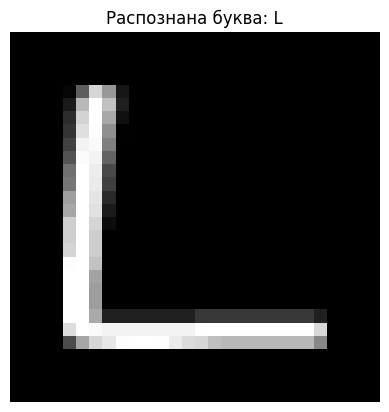

Правильное значение: L


In [ ]:
# Select the desired image from the test sample
n = 135
x = x_test[n]

# Array of one example, since neuronka accepts arrays of examples (batches) for recognizing
x = np.expand_dims(x, axis=0)

# Check the shape of the data
print(x.shape)

# Predict the selected image
prediction = model.predict(x)

# Output the result - a vector of 26 numbers
print(f'Result vector on 26 output neurons: {prediction}')

# Get and output the index of the largest element (this is the value of the digit recognized by the network)
pred = np.argmax(prediction)

# Display the image
plt.imshow(x.reshape(28, 28), cmap='gray')  # Convert to 2D array 28x28
plt.title(f'Letter recognized: {word_dict[pred]}')
plt.axis('off') # Disabling axes for better display
plt.show()

print(f'Correct value: {word_dict[np.argmax(y_test[n])]}')

In [ ]:
# Select the desired image from the test sample
n = 2153
x1 = x_test[n]

# Array of one example, since neuronka accepts arrays of examples (batches) for recognizing
x1 = np.expand_dims(x1, axis=0)

# Check the shape of the data
print(x1.shape)

# Predict the selected image
prediction1 = model.predict(x1)

# Output the result - a vector of 26 numbers
print(f'Result vector on 26 output neurons: {prediction1}')

# Get and output the index of the largest element (this is the value of the digit recognized by the network)
pred1 = np.argmax(prediction1)

# Display the image
plt.imshow(x1.reshape(28, 28), cmap='gray')  # Convert to 2D array 28x28
plt.title(f'Letter recognized: {word_dict[pred1]}')
plt.axis('off') # Disabling axes for better display
plt.show()

print(f'Correct value: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Вектор результата на 26 выходных нейронах: [[3.32968944e-26 7.14549253e-12 2.14546092e-09 7.97466648e-10
  3.79262680e-12 4.20307296e-11 1.17518517e-09 3.26230587e-22
  1.20703327e-04 1.25575904e-02 2.83011120e-18 8.00372220e-07
  1.44110631e-20 3.13255200e-18 2.42423913e-14 4.61608940e-24
  3.39843292e-11 1.95214401e-26 9.87320900e-01 2.06412470e-12
  1.13087074e-11 2.23911432e-14 1.39183056e-15 7.12208206e-14
  5.08254328e-09 8.77888094e-13]]


Правильное значение: S


In [ ]:
# Select the desired image from the test sample
n = 41
x2 = x_test[n]

# Array of one example, since neuronka accepts arrays of examples (batches) for recognizing
x2 = np.expand_dims(x2, axis=0)

# Check the shape of the data
print(x2.shape)

# Predict the selected image
prediction2 = model.predict(x2)

# Output the result - a vector of 26 numbers
print(f'Result vector on 26 output neurons: {prediction2}')

# Get and output the index of the largest element (this is the value of the digit recognized by the network)
pred2 = np.argmax(prediction2)

# Display the image
plt.imshow(x2.reshape(28, 28), cmap='gray')  # Convert to 2D array 28x28
plt.title(f'Letter recognized: {word_dict[pred2]}')
plt.axis('off')  # Disabling axes for better display
plt.show()

print(f'Correct value: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Вектор результата на 26 выходных нейронах: [[2.94448768e-19 1.25019385e-12 1.00000000e+00 1.54210000e-12
  1.27678161e-08 4.24945530e-11 8.35182895e-11 3.89977995e-22
  5.84249454e-11 2.16679109e-14 2.63139879e-12 2.92544722e-09
  1.10591825e-18 1.11504765e-17 1.41451970e-08 1.31552224e-17
  5.71470996e-12 5.37224820e-10 3.60549118e-10 3.44844426e-14
  7.70196060e-12 5.09462589e-13 3.46711138e-20 2.63955422e-18
  3.51172491e-15 7.48030002e-13]]


Правильное значение: C


Now, let's try creating a similar image in Photoshop and see how our network reacts to it

test_image.png

In [ ]:
from PIL import Image

# Uploading an image with a letter
image_path = 'test_image.png'  # Specify the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert image to numpy array
test_image = np.array(image)

# Check the shape of the data
print(f'Shape of image: {test_image.shape}')

# Change the data shape for the model
x_img = np.expand_dims(test_image, axis=0) # Add dimensionality for the batch

# Check the shape of the data
print(f'Data form for prediction: {x_img.shape}')

# Reshape the tensor
x_img = x_img.reshape((1, 28 * 28)))

# Normalize the image
x_img = x_img.astype('float32') / 255

# Predict the selected image
prediction3 = model.predict(x_img)

# Output the result - a vector of 26 numbers
print(f'Result vector on 26 output neurons: {prediction3}')

# Obtain and output the index of the largest element (this is the value of the letter recognized by the network)
pred3 = np.argmax(prediction3)

# Display image
plt.imshow(test_image, cmap='gray') # Convert to 2D array 28x28
plt.title(f'Letter recognized: {word_dict[pred3]}')
plt.axis('off') # Disabling axes for better display
plt.show()

print(f'Correct value: H')

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.png'